In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
sns.set_theme()

baseline_acc, baseline_auc = [], []
baseline_roc = []
for seed in range(819, 819 + 5):
    p = pickle.load(open(f'Data/GSE158055/exp/baseline_1024_3_{seed}/test_result.pkl', 'rb'))
    baseline_acc.append(p['test_acc'])
    baseline_auc.append(p['test_auc'])
    baseline_roc.extend(zip(p['fpr'], p['tpr']))

refined_acc, refined_auc = [], []
refined_roc = []
for seed in range(819, 819 + 5):
    p = pickle.load(open(f'Data/GSE158055/exp/refined_1024_3_{seed}/test_result.pkl', 'rb'))
    refined_acc.append(p['test_acc'])
    refined_auc.append(p['test_auc'])
    refined_roc.extend(zip(p['fpr'], p['tpr']))

refined_2_acc, refined_2_auc = [], []
refined_2_roc = []
for seed in range(819, 819 + 5):
    p = pickle.load(open(f'Data/GSE158055/exp/refined_1024_4_{seed}/test_result.pkl', 'rb'))
    refined_2_acc.append(p['test_acc'])
    refined_2_auc.append(p['test_auc'])
    refined_2_roc.extend(zip(p['fpr'], p['tpr']))

refined_3_acc, refined_3_auc = [], []
refined_3_roc = []
for seed in range(819, 819 + 5):
    p = pickle.load(open(f'Data/GSE158055/exp/refined-3_1024_3_{seed}/test_result.pkl', 'rb'))
    refined_3_acc.append(p['test_acc'])
    refined_3_auc.append(p['test_auc'])
    refined_3_roc.extend(zip(p['fpr'], p['tpr']))

In [2]:
np.mean(baseline_acc), np.mean(refined_acc), np.mean(refined_2_acc)

(0.7461538461538462, 0.7846153846153845, 0.7884615384615384)

In [3]:
np.mean(baseline_auc), np.mean(refined_auc), np.mean(refined_2_auc)

(0.8347900839585524, 0.8621824234081789, 0.8687597562197105)

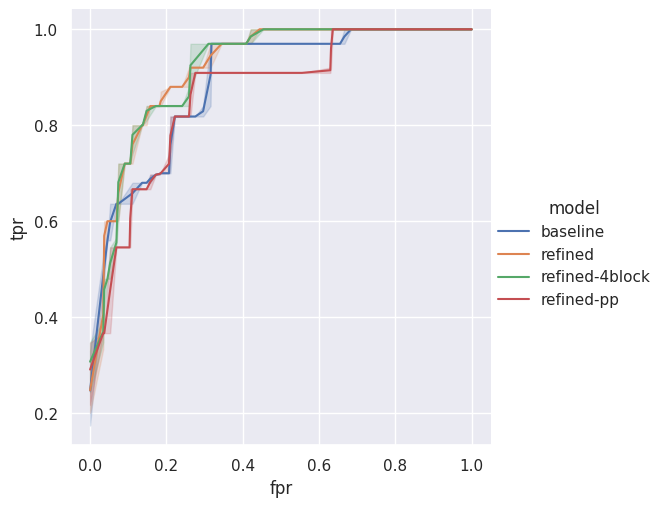

In [4]:
def process(roc):
    roc.sort(key=lambda p: p[0])
    for i in range(len(roc) - 1):
        roc[i + 1] = roc[i + 1][0], max(roc[i][1], roc[i + 1][1])
process(baseline_roc)
process(refined_roc)
process(refined_2_roc)
process(refined_3_roc)

baseline_roc = pd.DataFrame(baseline_roc, columns=['fpr', 'tpr'])
baseline_roc['model'] = 'baseline'
refined_roc = pd.DataFrame(refined_roc, columns=['fpr', 'tpr'])
refined_roc['model'] = 'refined'
refined_2_roc = pd.DataFrame(refined_2_roc, columns=['fpr', 'tpr'])
refined_2_roc['model'] = 'refined-4block'
refined_3_roc = pd.DataFrame(refined_3_roc, columns=['fpr', 'tpr'])
refined_3_roc['model'] = 'refined-pp'
roc = pd.concat([baseline_roc, refined_roc, refined_2_roc, refined_3_roc]).reset_index()
sns.relplot(kind='line', data=roc, x='fpr', y='tpr', hue='model')